<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [3]:
df_likes=pd.read_csv('Likes.csv')
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [4]:
df_likes.shape

(2104, 15)

In [5]:
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [6]:

Total = df_likes.isnull().sum().sort_values(ascending=False)          


Percent = (df_likes.isnull().sum()*100/df_likes.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
gender,2,0.095057
userid,0,0.000000
age,0,0.000000
dob_day,0,0.000000
dob_year,0,0.000000
dob_month,0,0.000000
tenure,0,0.000000
friend_count,0,0.000000
friendships_initiated,0,0.000000
likes,0,0.000000


In [7]:
df_likes['gender'].value_counts()

male      1400
female     702
Name: gender, dtype: int64

In [8]:
df_likes['gender'][df_likes['gender'].isnull()==True]

355     NaN
1948    NaN
Name: gender, dtype: object

In [9]:
df_likes['gender'].replace(np.nan,'male',inplace=True)

In [10]:
Total = df_likes.isnull().sum().sort_values(ascending=False)          


Percent = (df_likes.isnull().sum()*100/df_likes.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
userid,0,0.000000
age,0,0.000000
dob_day,0,0.000000
dob_year,0,0.000000
dob_month,0,0.000000
gender,0,0.000000
tenure,0,0.000000
friend_count,0,0.000000
friendships_initiated,0,0.000000
likes,0,0.000000


In [11]:
df_likes = df_likes.drop('userid',axis=1)

INFERENCES:we treated the given dataset with removing missing values and removing columns which are not useful to predict our model

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

Text(0.5, 1.0, 'Density of likes')

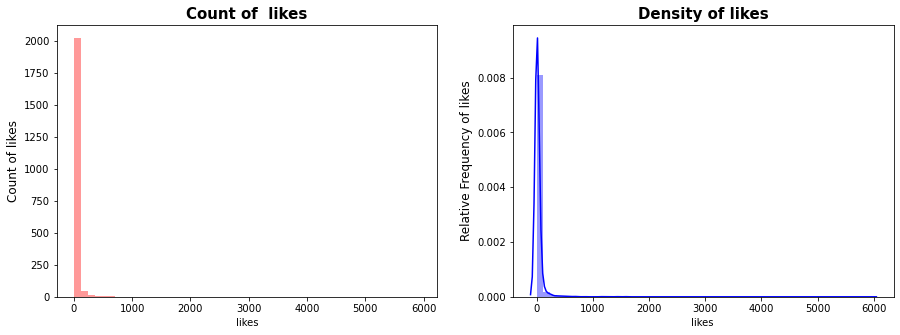

In [133]:
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_likes['likes'], norm_hist=False, kde=False, ax=ax[0], color='red')
ax[0].set_xlabel('likes')
ax[0].set_ylabel('Count of likes',size=12)
ax[0].set_title('Count of  likes',size=15,weight="bold")

sns.distplot(df_likes['likes'], kde=True, ax=ax[1], color='blue')
ax[1].set_xlabel('likes ')
ax[1].set_ylabel('Relative Frequency of likes',size=12)
ax[1].set_title('Density of likes',size=15,weight="bold")

INFERENCES:most of likes are concentrated higly at one place.

In [133]:
numeric_df=df_likes.select_dtypes(include=[np.number])
numeric_df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0


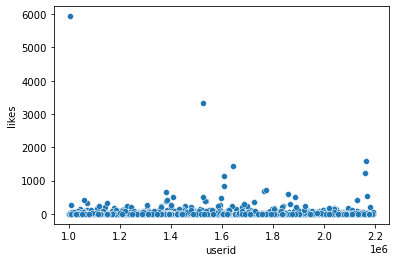

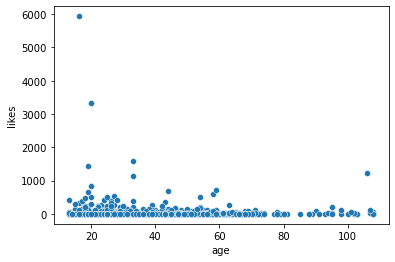

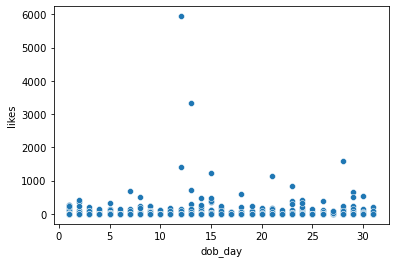

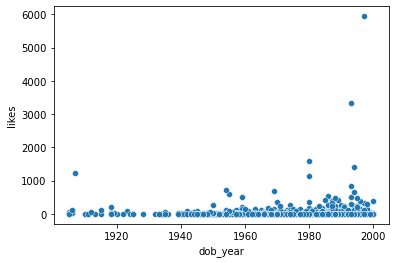

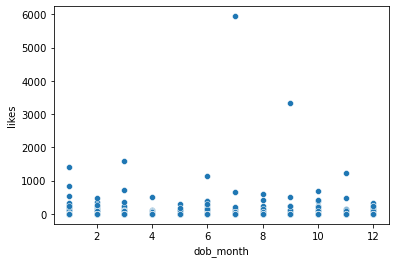

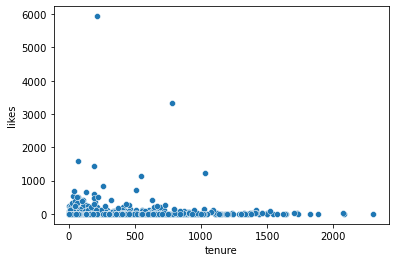

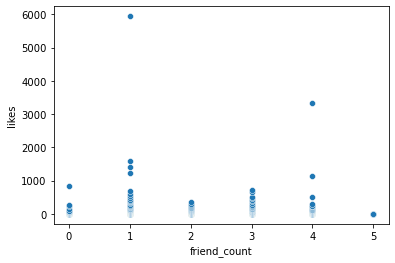

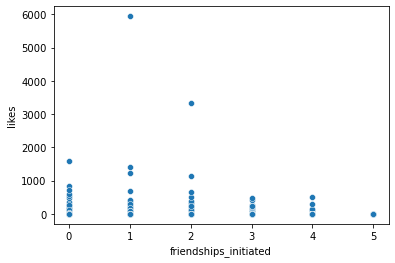

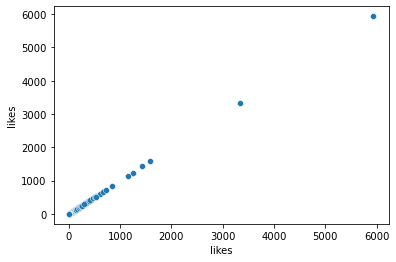

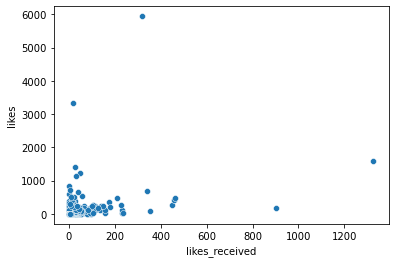

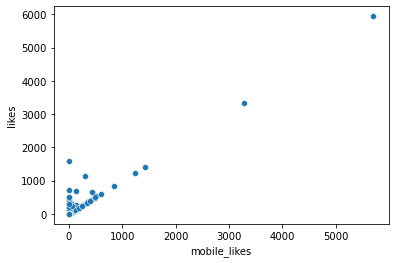

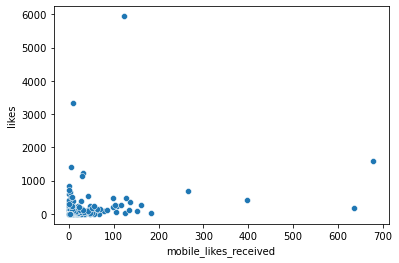

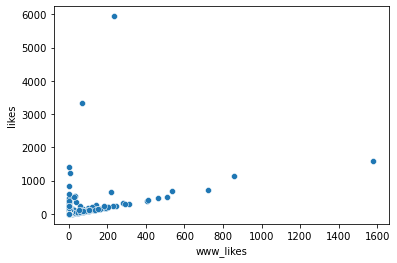

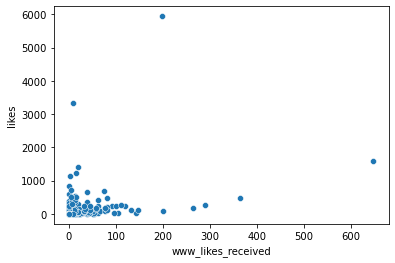

In [134]:
for feature, column in enumerate (numeric_df.columns):
    plt.figure(feature)
    sns.scatterplot(x=numeric_df[column],y=numeric_df['likes'])

INFERENCE:By seeing scatter plot ,there is relationship between likes and mobile likes ,www_likes ,friendships initiated

# HISTOGRAM

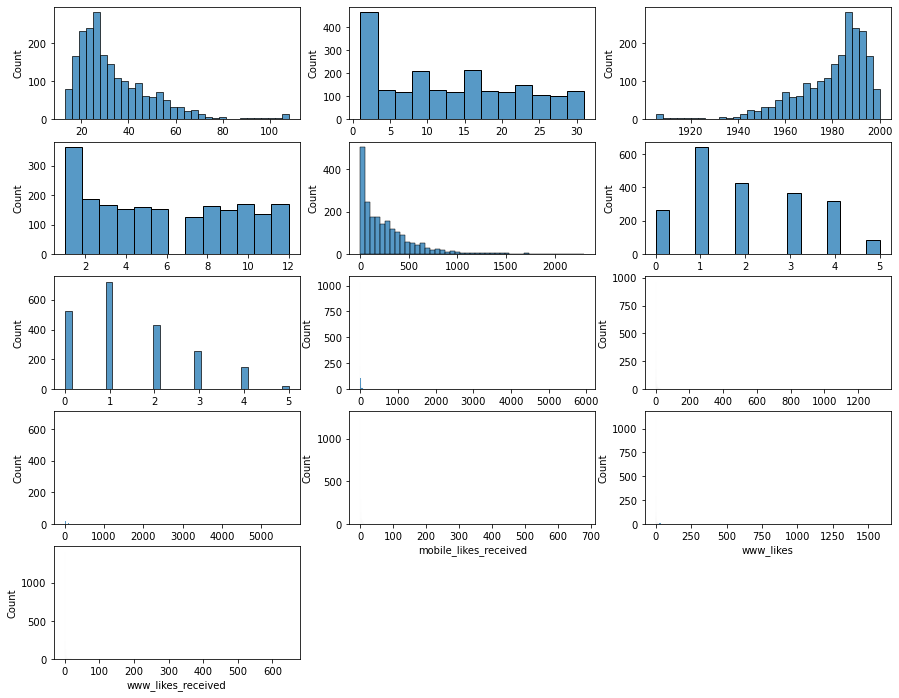

In [11]:
plt.figure(figsize=(15,12))
for a,b in enumerate(df_likes.select_dtypes(np.number).columns):
    plt.subplot(5,3,a+1)
    sns.histplot(df_likes[b])

INFERENCE:age,dob_year,tenure are positively skewed 

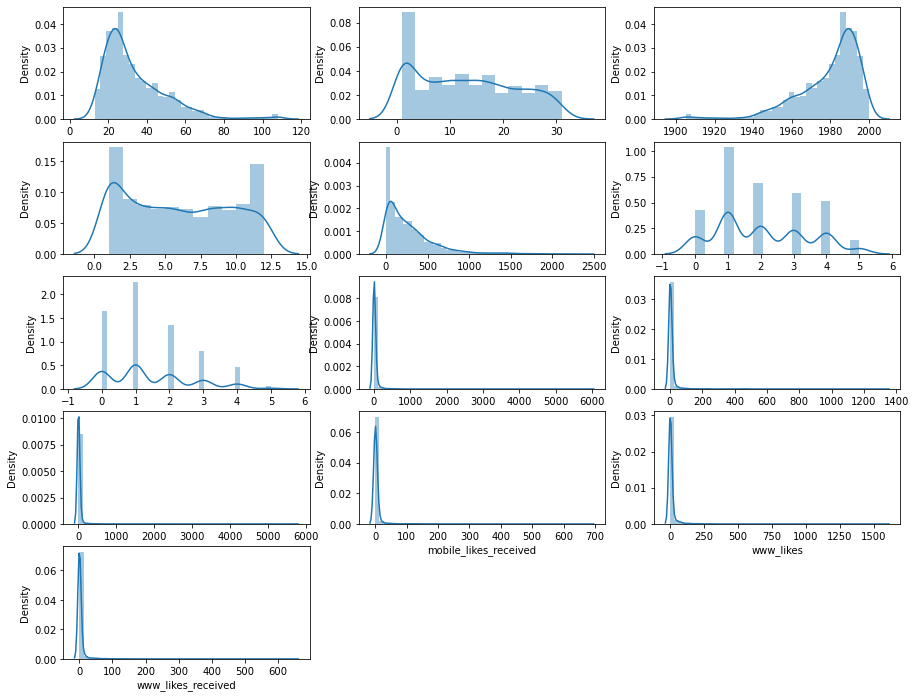

In [12]:
plt.figure(figsize=(15,12))
for a,b in enumerate(df_likes.select_dtypes(np.number).columns):
    plt.subplot(5,3,a+1)
    sns.distplot(df_likes[b])

In [12]:
df_likes = df_likes.drop(['dob_day','dob_year','dob_month'],axis=1)
df_likes['age'] = df_likes.age.astype('object')

In [13]:
df_likes.skew()

age                      1.628574
tenure                   2.083550
friend_count             0.339367
friendships_initiated    0.694958
likes                   24.959317
likes_received          18.418021
mobile_likes            28.564966
mobile_likes_received   18.566706
www_likes               16.941493
www_likes_received      17.059494
dtype: float64

In [14]:
df_likes[['likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received','tenure']] = np.sqrt(df_likes[['likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received','tenure']])
df_likes['likes'] = np.sqrt(df_likes['likes'])

In [15]:
df_likes.skew()

age                     1.628574
tenure                  0.576790
friend_count            0.339367
friendships_initiated   0.694958
likes                   6.316372
likes_received          4.926598
mobile_likes            7.844530
mobile_likes_received   5.333964
www_likes               4.541539
www_likes_received      4.762303
dtype: float64

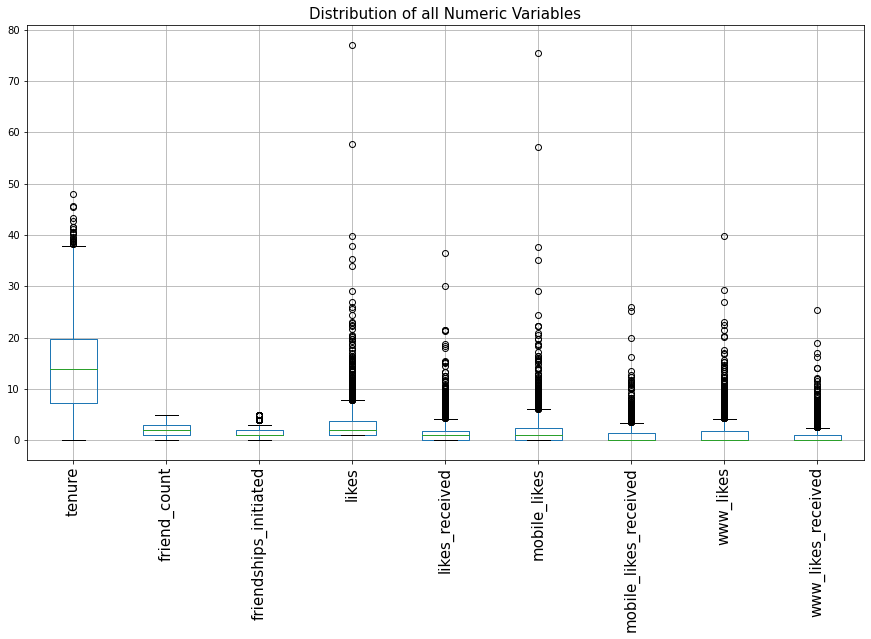

In [16]:
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_likes.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

OUTLIER TREATMENT

In [17]:
Q1 = df_likes.quantile(0.25)

# calculate the third quartile
Q3 = df_likes.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1
df_likes=df_likes[~((df_likes < (Q1 - 1.5 * IQR)) | (df_likes > (Q3 + 1.5 * IQR))).any(axis=1)]


In [18]:
df_likes.shape

(1540, 11)

In [19]:
print('data after removal of outliers present:',df_likes.shape)

data after removal of outliers present: (1540, 11)


<AxesSubplot:>

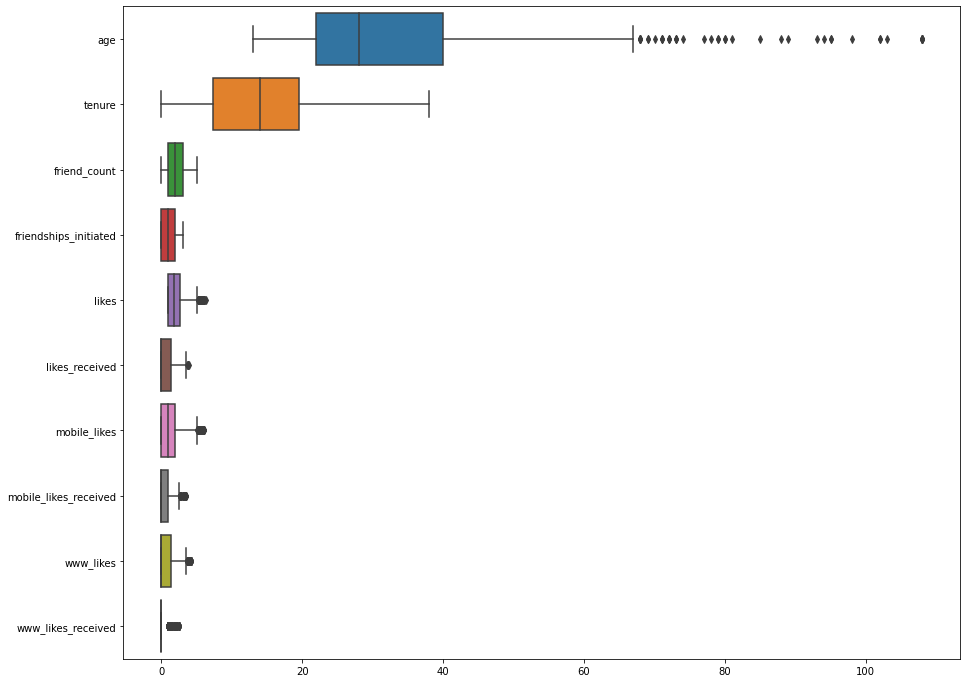

In [20]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_likes,orient='h')

In [21]:
df_likes.skew()

age                     1.615656
tenure                  0.377685
friend_count            0.414317
friendships_initiated   0.364259
likes                   1.371158
likes_received          1.003931
mobile_likes            1.156413
mobile_likes_received   1.468838
www_likes               1.389436
www_likes_received      1.743624
dtype: float64

In [22]:
df_likes = df_likes.dropna(subset=['gender'])

In [23]:
df_likes.shape

(1540, 11)

Inference:
 The plots have been plotted using subplots and understood how the data is skewed.
 The Data is skewed , after then the neccessary transformation was done to reduce the skewness.
The Outluers are present in the data and they are removed.

<AxesSubplot:>

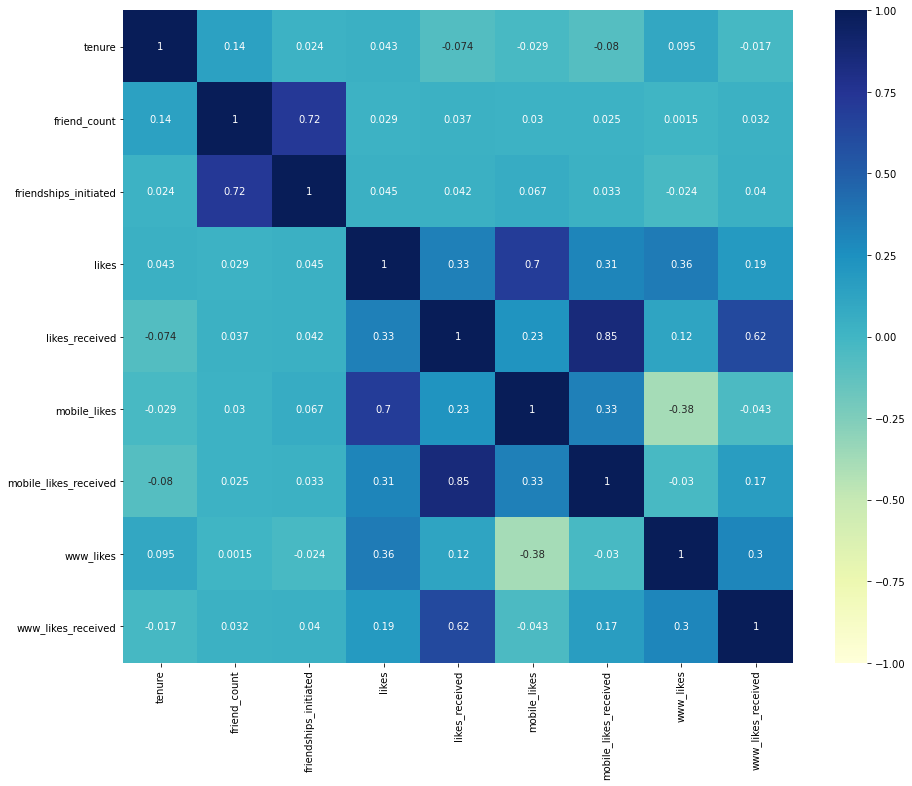

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(df_likes.corr(),annot=True,cmap='YlGnBu',vmax=1.0,vmin=-1.0)

Inference:
Step1 : The independent variable which have positive correlation with dependent variable is "mobile_likes","www_likes","likes_received"
The independent variable which have slight negative correlation with dependent variable is "tenure"
Step2 : There is strong positive correlation between likes_received and mobile_likes_received
There is negative correlation between www_likes and mobile_likes

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [25]:
df_indep = df_likes.drop('likes',axis=1)
df_dep = df_likes['likes']

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_likes['age' ] = le.fit_transform(df_likes[['age']])

In [27]:
df_likes['gender_male'] = pd.get_dummies(df_likes['gender'],drop_first=True)

In [28]:
df_likes.drop('gender',axis=1,inplace=True)

In [29]:
df_num = df_likes.select_dtypes(np.number).columns
df_likes[df_num] = df_likes.select_dtypes(np.number).apply(lambda x: (x-x.mean())/x.std())

In [30]:
X = df_likes.drop('likes',axis=1)
X = sm.add_constant(X)
y = df_likes['likes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train_ (1078, 11)
y_train (1078,)
X_test (462, 11)
y_test (462,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



1.Building a Linear Regression using OLS

In [32]:
df_likes.sample()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
923,-0.319719,-0.501025,0.128105,0.769509,-0.854901,-0.804682,-1.011130,-0.626998,0.230843,-0.514212,0.678823


In [33]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train,X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1958.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                 59.139
No. Observations:                1078   AIC:                            -96.28
Df Residuals:                    1067   BIC:                            -41.47
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

In [34]:
r_sq_mlr = MLR_full_model.rsquared

# print the value
print('r square :',r_sq_mlr)

r square : 0.9483285930652409


In [35]:

y_train_pred = MLR_full_model.predict(X_train)

mse = mean_squared_error(y_train,y_train_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of train dataset',rmse)

y_test_pred = MLR_full_model.predict(X_test)

mse = mean_squared_error(y_test,y_test_pred)

rmse = np.sqrt(mse)

print('Root Mean squared error of test dataset',rmse)

Root Mean squared error of train dataset 0.2290538189619552
Root Mean squared error of test dataset 0.24331440407086447


In [ ]:
# As the rmse value of test dataset is same when compared with train dataset. The model is robust.

In [37]:
linreg = LinearRegression()
linrfe = RFE(estimator=linreg,n_features_to_select=5)
rfe_model = linrfe.fit(X_train,y_train)
a = pd.Series(rfe_model.ranking_,name='rank')
b = pd.Series(df_likes.columns.values,name='name')
feat = pd.concat([a,b],axis=1)
sig_var = feat[feat['rank']==1]['name'].values
sig_var

array(['likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received'], dtype=object)

In [38]:
X = X[sig_var]
X = sm.add_constant(X)
y = df_likes['likes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1078, 6)
(462, 6)
(1078,)
(462,)


In [39]:
MLR_rfe_model = sm.OLS(y_train,X_train).fit()
print(MLR_rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3460.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:59:11   Log-Likelihood:                 22.211
No. Observations:                1078   AIC:                            -32.42
Df Residuals:                    1072   BIC:                            -2.525
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [40]:
MLR_rfe_model.rsquared

0.9416551738223206

In [41]:
# RMSE on both test and train dataset

y_train_pred = MLR_rfe_model.predict(X_train)

mse = mean_squared_error(y_train,y_train_pred)

rmse_train = np.sqrt(mse)

print('Root Mean squared error of train dataset',rmse_train)

y_test_pred = MLR_rfe_model.predict(X_test)

mse = mean_squared_error(y_test,y_test_pred)

rmse_test = np.sqrt(mse)

print('Root Mean squared error of test dataset',rmse_test)

Root Mean squared error of train dataset 0.23703614982768287
Root Mean squared error of test dataset 0.22458015028542772


In [42]:
MLR_rfe_model.rsquared

0.9416551738223206

In [45]:
from sklearn.metrics import r2_score
train_r2 = []
test_r2 = []
train_r2.append(MLR_rfe_model.rsquared)
test_r2.append(r2_score(y_test, y_test_pred))
print(train_r2)
print(test_r2)

[0.9416551738223206]
[0.9534698073126915]


In [53]:
r2_scores_train = []
r2_scores_test = []
rmr2_scores_train = []
r2_scores_test = []
rmse_values_train = []
rmse_values_test = []

# add constant
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)

for i in range(4,31):
    rfe_1 = RFE(estimator=LinearRegression(),n_features_to_select=i)
    rfe_1.fit(X_train,y_train)
    feature_ranks = pd.Series(rfe_1.ranking_, index = X_train.columns)
    selected_features = feature_ranks[feature_ranks==1].index
    
    # run the model
    
    lr_model = sm.OLS(y_train,X_trainc[selected_features]).fit()
                                      
    y_pred_train_rfe = lr_model.predict(X_trainc[selected_features]) 
    y_pred_test_rfe = lr_model.predict(X_testc[selected_features]) 
    
    # train
    r2_scores_train.append(r2_score(y_train,y_pred_train_rfe))
    rmse_values_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train_rfe)))
    
    # test
    r2_scores_test.append(r2_score(y_test,y_pred_test_rfe))
    rmse_values_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test_rfe)))

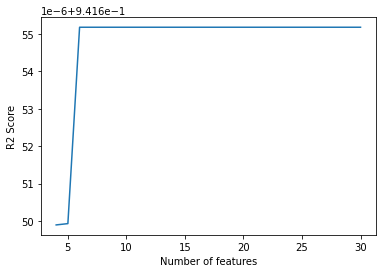

In [54]:
sns.lineplot(x = range(4,31), y = r2_scores_train)

plt.ylabel('R2 Score')
plt.xlabel('Number of features')

plt.show()

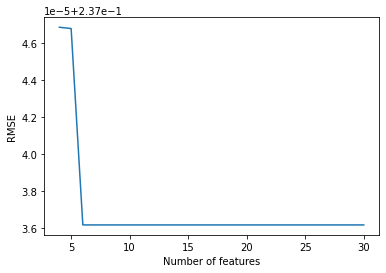

In [55]:
sns.lineplot(x = range(4,31), y = rmse_values_train)

plt.ylabel('RMSE')
plt.xlabel('Number of features')


plt.show()

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

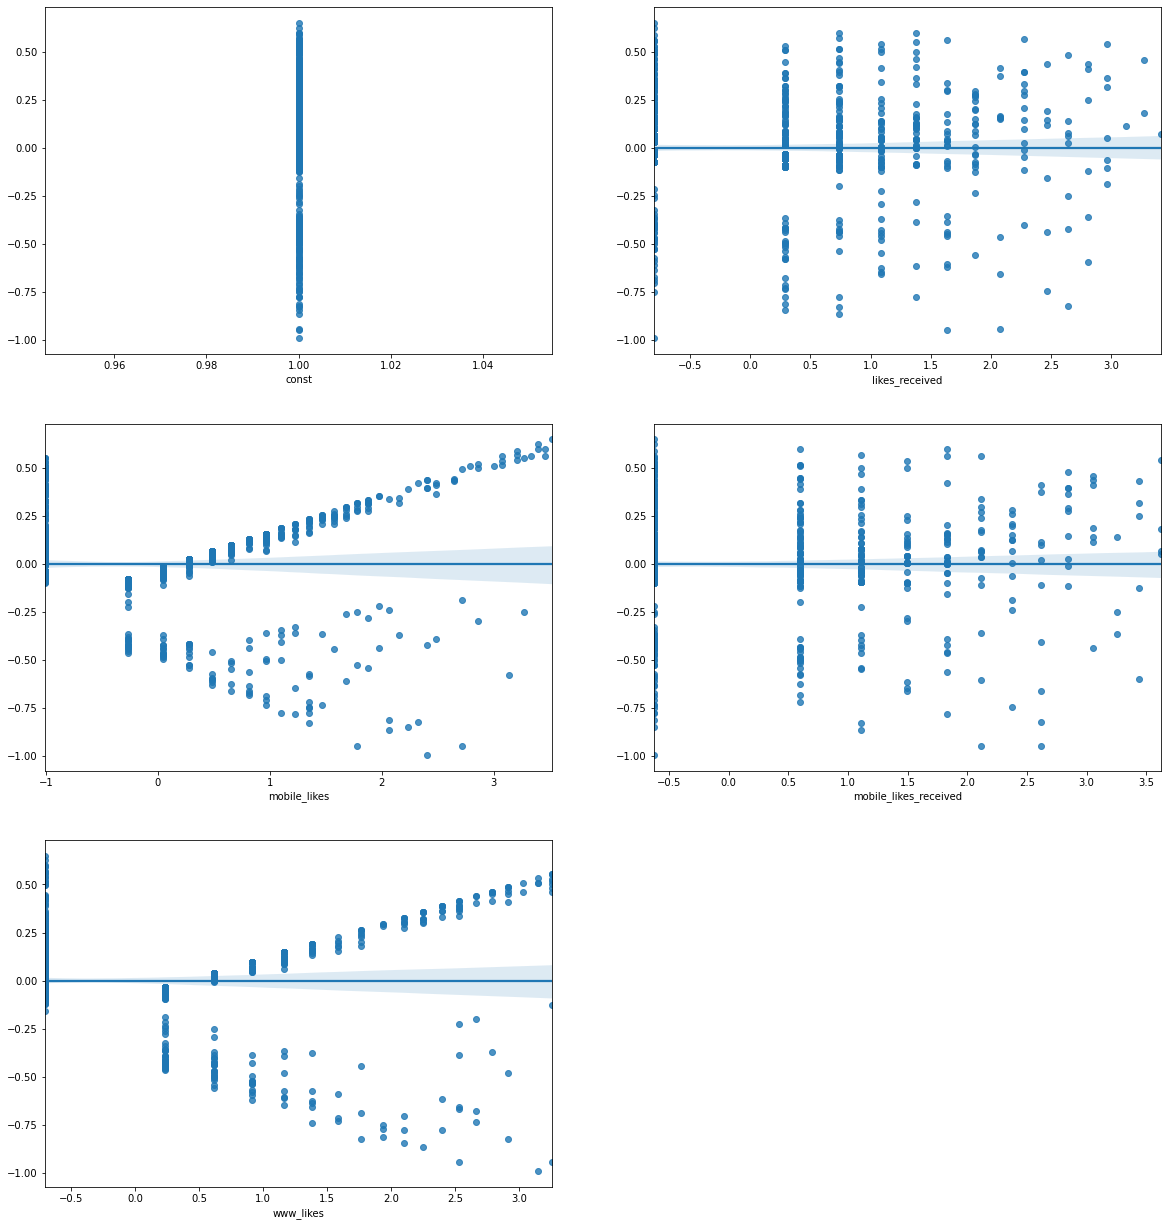

In [56]:
# residual plot of errors vs independent variables

residuals = lr_model.resid

df_features = X_train.select_dtypes(np.number)

plt.figure(figsize =(20,60))

for i in range(1,len(df_features.columns)):
    plt.subplot(8,2,i)
    sns.regplot(df_features[df_features.columns[i-1]], residuals)
    
plt.show()

There is no obvious pattern in the plots so we infer that the assumption of linearityis not violated.

In [48]:
from statsmodels.compat import lzip

In [49]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_rfe_model.resid, MLR_rfe_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 539.5122084536035), ('p-value', 1.113467902414298e-289)]

In [50]:
p = 2.825071501895677e-85
if p <0.05:
    print('ha is selected')
else:
    print('h0 is selected')

ha is selected


In [ ]:
# There is a heteroscedasticity present in the data

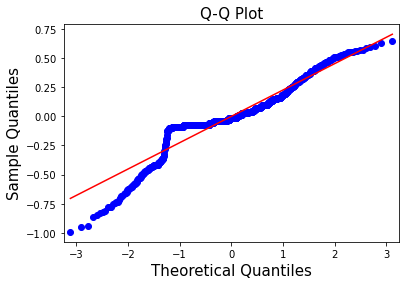

In [51]:
sm.qqplot(MLR_rfe_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [52]:
MLR_model_after_transform = sm.OLS(np.exp(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     386.3
Date:                Tue, 01 Feb 2022   Prob (F-statistic):          7.52e-237
Time:                        16:35:24   Log-Likelihood:                -2474.0
No. Observations:                1078   AIC:                             4960.
Df Residuals:                    1072   BIC:                             4990.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.00

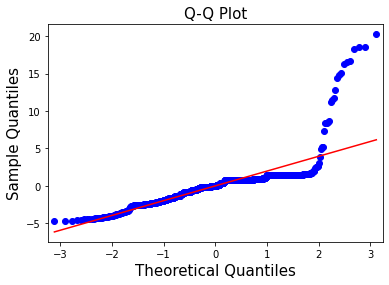

In [53]:
sm.qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [54]:
print('The mean of the residuals is',round((np.sum(MLR_model_after_transform.resid)/len(MLR_model_after_transform.resid)),4))

The mean of the residuals is -0.0


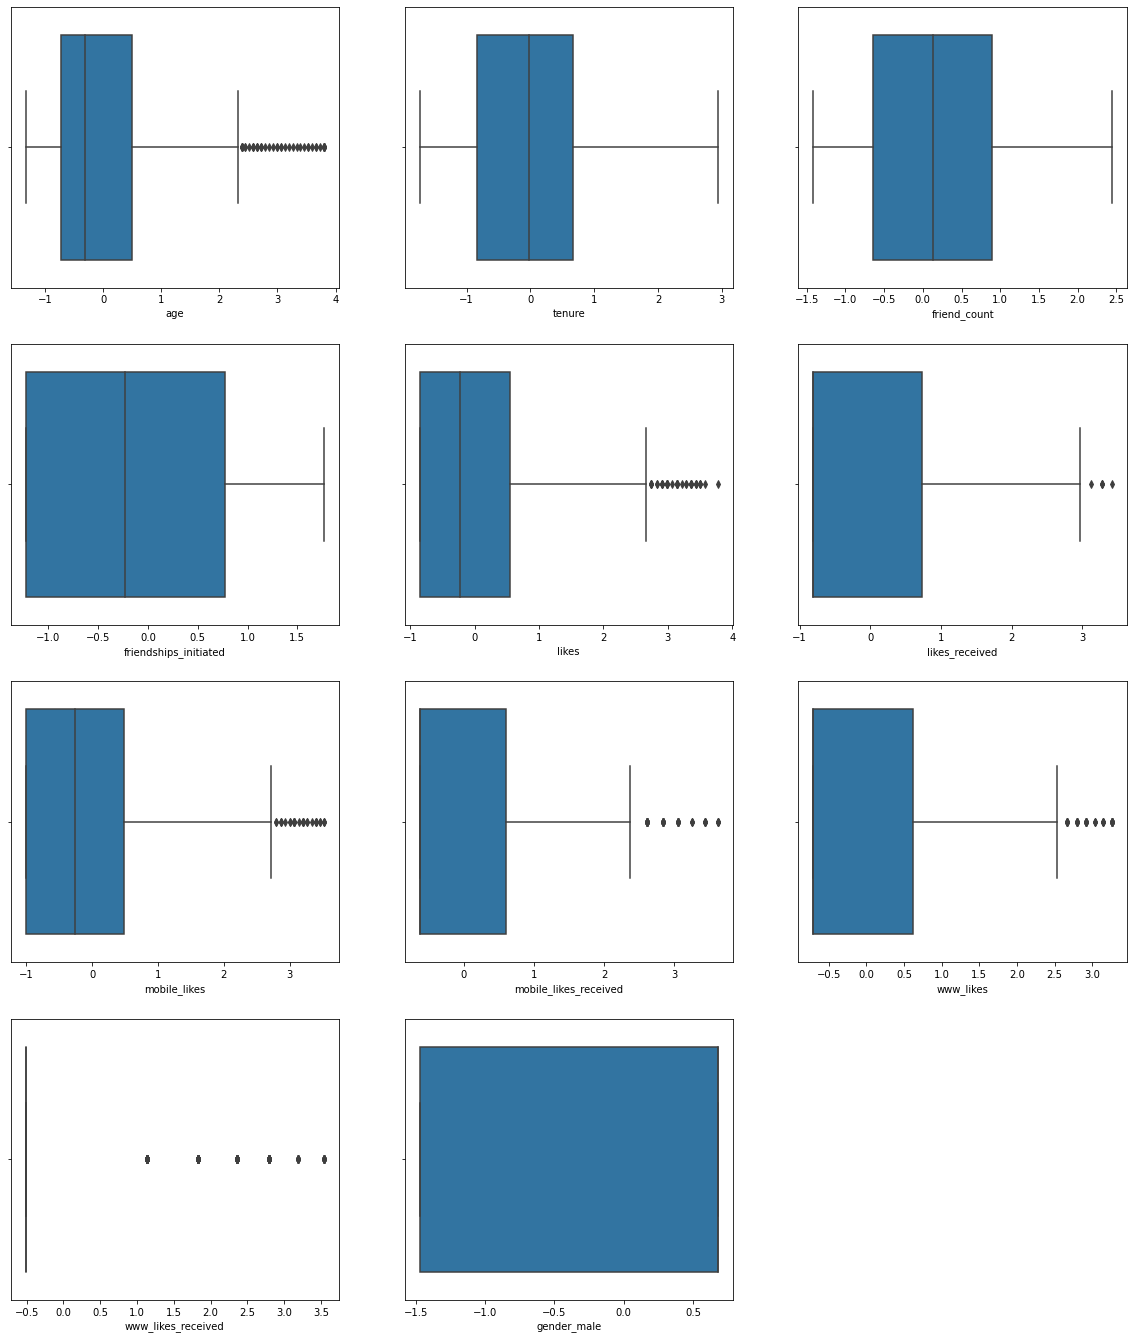

In [59]:
# plotting box plot to identify outliers

plt.figure(figsize = (20,30))

num_cols = df_likes.select_dtypes(np.number).columns

for i in range(1,len(num_cols)+1):
    plt.subplot(5,3,i)
    sns.boxplot(df_likes[num_cols[i-1]])
    
plt.show()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [55]:
scores = cross_val_score(estimator=linreg,X=X_train,y=y_train,cv=5,scoring='r2')
scores

array([0.92090979, 0.94825219, 0.94332731, 0.94114209, 0.93736346])

In [56]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.92090979 0.94825219 0.94332731 0.94114209 0.93736346]

Minimum score obtained:  0.9209
Maximum score obtained:  0.9483
Average score obtained:  0.9382
